# Trabajo 2: Árboles de Decisión y Regresiones Lineales

**Integrantes:**

- Jessica Bilbao Restrepo
- Santiago Gómez Montoya

# Dataset

Este dataset contiene información de venta de apartamentos de los últimos 10 años para un distrito específico en una ciudad.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df = pd.read_csv('Daegu_Real_Estate_data.csv')

In [3]:
df

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


### Descripción de las variables

- SalePrice: Precio de venta del apartamento
- YearBuilt: Año en el que fue construido el apartamento
- YrSold: Año en el que se vendió el apartamento
- MonthSold: Mes del año en el que se vendió
- Size(sqf): Tamaño del apartamento en pies cuadrados
- Floor: Piso en el que se encuentra el apartamento
- HallwayType: Tipo de corredor que tiene la casa
- HeatingType: Tipo de calefacción
- AptManageType: Tipo de gestión de mantenimiento, la limpieza y la seguridad del apartamento
- N_Parkinglot(Ground): Número de celda en parqueadero en la interperie
- N_Parkinglot(Basement): Número de celda en parqueadero subterraneo
- TimeToBusStop: Tiempo yendo a la parada de bus
- TimeToSubway: Tiempo yendo al metro
- N_APT: Número del apartamento
- N_manager: Posible identicador del administrador
- N_elevators: Cantidad de elevadores
- SubwayStation: Estación del metro donde se encuentra el apartamento
- N_FacilitiesNearBy(PublicOffice): Oficinas publicas cercanas
- N_FacilitiesNearBy(Hospital): Hospitales cercanos    
- N_FacilitiesNearBy(Dpartmentstore): Almacenes cercanos
- N_FacilitiesNearBy(Mall): Centros comerciales cercanos
- N_FacilitiesNearBy(ETC): Posible edificio de atención médica cerca del apartamento
- N_FacilitiesNearBy(Park): Parques cercanos al apartamento
- N_SchoolNearBy(Elementary): Escuales primarias cercanas
- N_SchoolNearBy(Middle): Escuelas secundarias cercanas
- N_SchoolNearBy(High): Escuelas prepartorias cercanas
- N_SchoolNearBy(University): Universidades cercanas
- N_FacilitiesInApt: Número de instalaciones en el apartamento
- N_FacilitiesNearBy(Total): Cantidad total de instalaciones cercanas
- N_SchoolNearBy(Total): Cantidad totaol de escuelas y univesidades cercanas

In [4]:
df.describe()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,221218.112545,2002.967408,2012.691563,6.160244,955.569173,12.026311,195.883551,570.761670,5.613648,6.310304,...,0.941436,1.941266,0.654218,3.022407,2.417756,2.659311,2.764726,5.809540,9.870820,10.864200
std,106384.186446,8.811782,2.905488,3.387752,382.464050,7.548743,218.597210,408.621075,2.811831,3.174088,...,0.401355,2.201392,0.658320,0.954575,1.037898,1.556041,1.489289,2.330804,3.450319,4.438513
min,32743.000000,1978.000000,2007.000000,1.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,144247.000000,1993.000000,2010.000000,3.000000,644.000000,6.000000,11.000000,184.000000,3.000000,5.000000,...,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,4.000000,8.000000,7.000000
50%,207964.000000,2006.000000,2013.000000,6.000000,910.000000,11.000000,100.000000,536.000000,7.000000,6.000000,...,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,9.000000,10.000000
75%,291150.000000,2008.000000,2015.000000,9.000000,1149.000000,17.000000,249.000000,798.000000,8.000000,8.000000,...,1.000000,5.000000,1.000000,4.000000,3.000000,4.000000,4.000000,7.000000,13.000000,15.000000
max,585840.000000,2015.000000,2017.000000,12.000000,2337.000000,43.000000,713.000000,1321.000000,13.000000,14.000000,...,2.000000,5.000000,2.000000,6.000000,4.000000,5.000000,5.000000,10.000000,16.000000,17.000000


### Recuento de variables nulas

In [5]:
df.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


### Histograma de frecuencia de cada variable

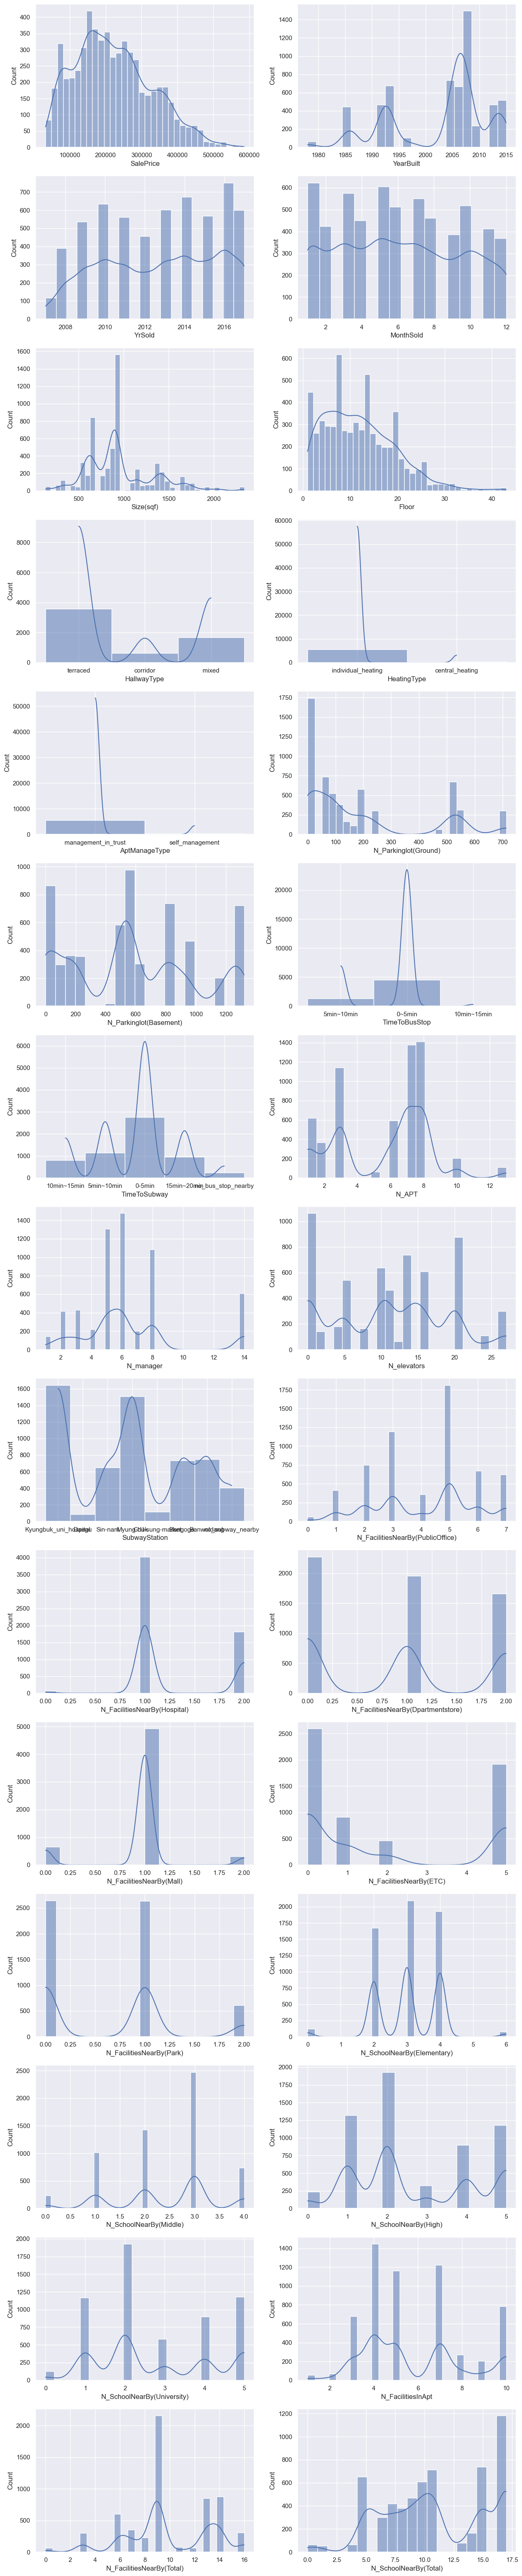

In [6]:
sns.set()
fig = plt.figure(figsize = [15,80])
cols = df.columns
cnt = 1
for col in cols :
    plt.subplot(15,2,cnt)
    sns.histplot(df[col], kde = True)
    cnt+=1
plt.show()

## Gráfico de barras de cada variable vs precio de venta

In [7]:
fig = plt.figure(figsize = [50,300])
cols = list(df.columns)
cols.remove('SalePrice')
cnt = 1
for col in cols :
    plt.subplot(30,1,cnt)
    sns.barplot(data = df, x = col, y = 'SalePrice').set(title='SalePrice vs {0}'.format(col))
    cnt+=1
plt.show()

## Mapa de calor de la correlación de los datos.

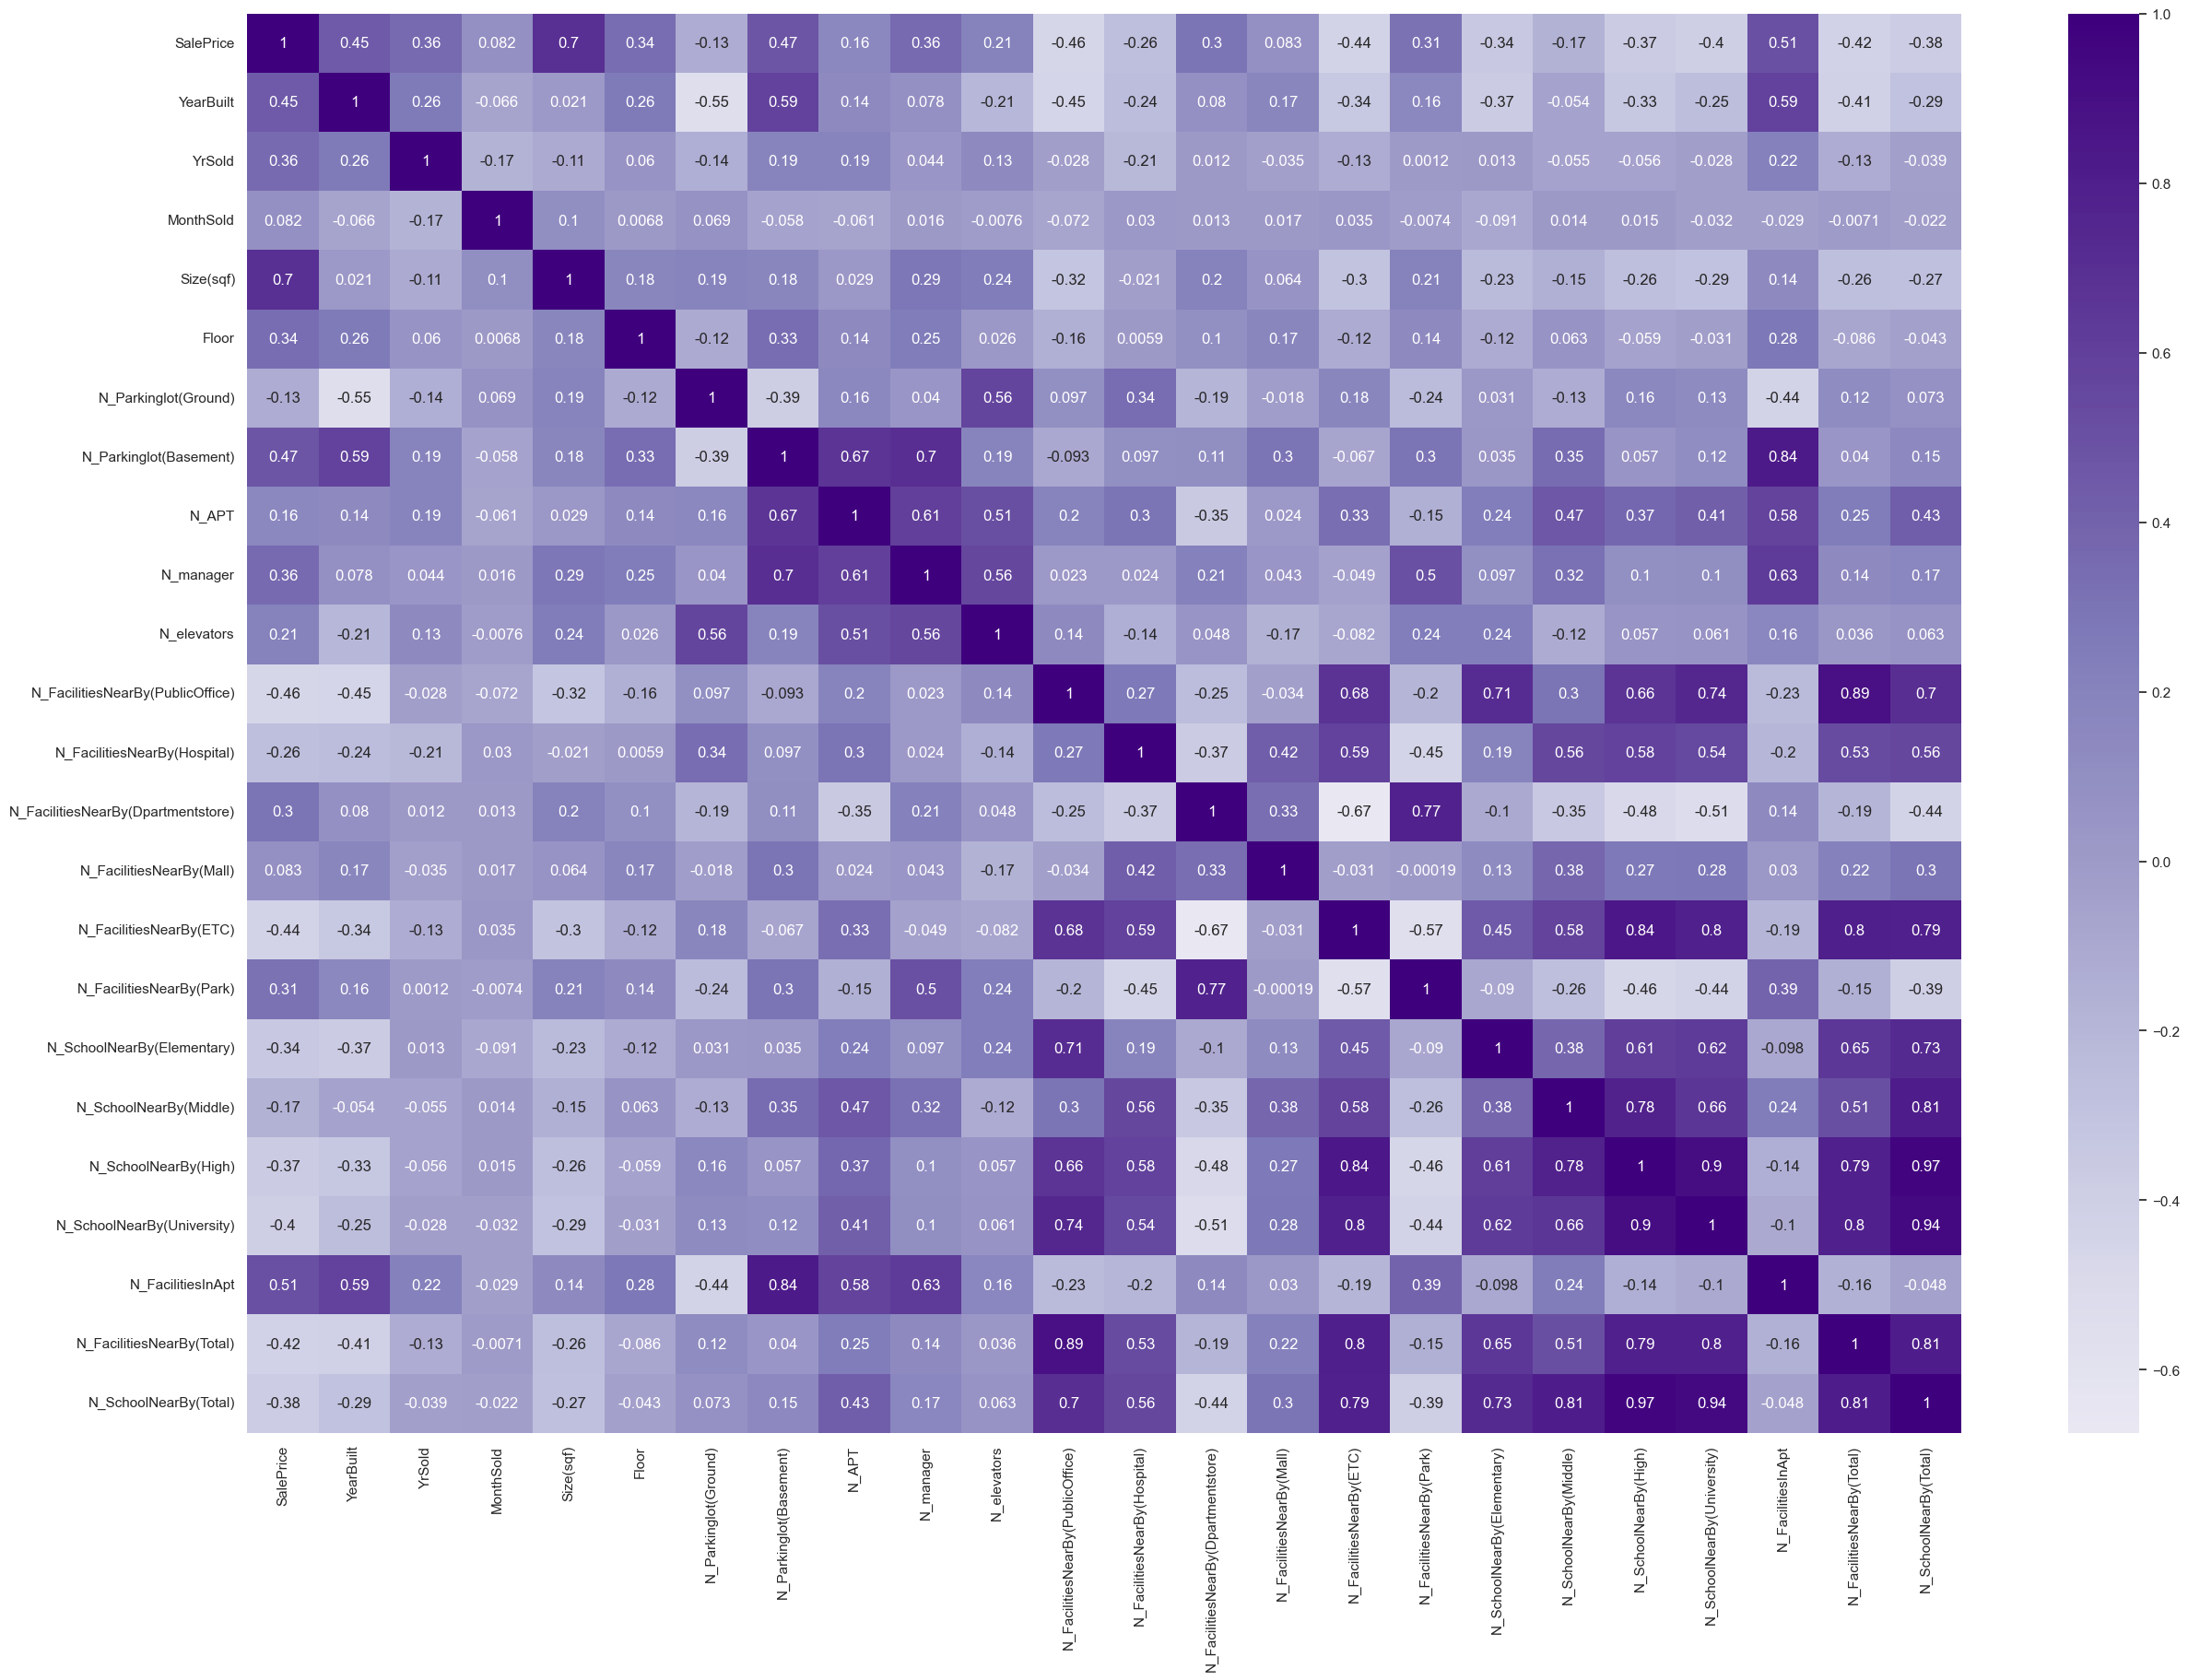

In [8]:
fig = plt.figure(figsize = [30,20])
sns.heatmap(df.corr(), annot = True, cmap = 'Purples', center = 0)
plt.show()

# Modelo de Árbol de Desición Regresor

## Variables dummies

In [83]:
dfWithDummiesTreeRegressor = pd.get_dummies(df)
dfWithDummiesTreeRegressor

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,141592,2006,2007,8,814,3,111.0,184.0,3.0,3.0,...,0,0,0,0,0,0,1,0,0,0
1,51327,1985,2007,8,587,8,80.0,76.0,1.0,2.0,...,1,0,0,0,0,1,0,0,0,0
2,48672,1985,2007,8,587,6,80.0,76.0,1.0,2.0,...,1,0,0,0,0,1,0,0,0,0
3,380530,2006,2007,8,2056,8,249.0,536.0,6.0,5.0,...,0,0,0,0,0,0,0,0,1,0
4,221238,1993,2007,8,1761,3,523.0,536.0,8.0,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,0.0,1270.0,7.0,14.0,...,0,0,0,0,0,0,1,0,0,0
5887,298230,2006,2017,8,903,13,123.0,181.0,3.0,3.0,...,0,0,0,0,0,0,0,1,0,0
5888,357522,2007,2017,8,868,20,0.0,1270.0,7.0,14.0,...,0,0,0,0,0,0,1,0,0,0
5889,312389,1978,2017,8,1327,1,87.0,0.0,2.0,1.0,...,0,0,0,0,0,0,1,0,0,0


## Conjunto de entrenamiento y conjunto de pruebas

In [106]:
np.random.seed(64923)
dfTreeRegressor_train, dfTreeRegresor_test = train_test_split(dfWithDummiesTreeRegressor, test_size = 0.2)
yTreeRegressor_train = dfTreeRegressor_train['SalePrice'].values
dfTreeRegressor_train = dfTreeRegressor_train.drop(['SalePrice'], axis = 1)
yTreeRegressor_test = dfTreeRegresor_test['SalePrice'].values
dfTreeRegressor_test = dfTreeRegresor_test.drop(['SalePrice'], axis = 1)

## Creando y entrenando el modelo

In [107]:
np.random.seed(64923)
regressor = DecisionTreeRegressor()
regressor.fit(dfTreeRegressor_train, yTreeRegressor_train)

DecisionTreeRegressor()

## Entrenando hiperparámetros

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [87]:
grid_parameters = {
    'max_depth': range(4,20),
    'min_samples_leaf': range(10,200,10),
    'min_samples_split': range(10,200,10),
    'criterion': ['squared_error', 'friedman_mse']
}
n_folds = 5

In [88]:
np.random.seed(64923)
regressionTreeHyper = DecisionTreeRegressor()
grid = GridSearchCV(regressionTreeHyper, grid_parameters, cv = n_folds, n_jobs = -1, return_train_score=True)

In [89]:
np.random.seed(64923)
grid.fit(dfTreeRegressor_train, yTreeRegressor_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': range(4, 20),
                         'min_samples_leaf': range(10, 200, 10),
                         'min_samples_split': range(10, 200, 10)},
             return_train_score=True)

## Score

### Sin hiperparámetros

In [108]:
np.random.seed(64923)
regressor.score(dfTreeRegressor_test, yTreeRegressor_test.reshape(-1,1))

0.9569655421975582

In [109]:
grid.best_score_

0.9647518166059775

In [110]:
np.random.seed(64923)
best_grid = grid.best_estimator_
best_grid.fit(dfTreeRegressor_train,yTreeRegressor_train)

DecisionTreeRegressor(max_depth=18, min_samples_leaf=10, min_samples_split=20)

In [113]:
np.random.seed(64923)
best_grid.score(dfTreeRegressor_test, yTreeRegressor_test.reshape(-1,1))

0.9614352625172833

### Mean Squared Error y Root of Mean Squared Error

In [94]:
mseRegressor = mean_squared_error(yTreeRegressor_test, y_predict_regressor)
mseRegressorHyper = mean_squared_error(yTreeRegressor_test, y_predicts_hyperparam)
rmseRegressor = mean_squared_error(yTreeRegressor_test, y_predict_regressor, squared = False)
rmseRegressorHyper = mean_squared_error(yTreeRegressor_test, y_predicts_hyperparam, squared = False)

print("Mean square Error para regresor normal: ", mseRegressor)
print("Root of Mean Squared Error: ", rmseRegressor)
print()
print("Mean square Error para regresor con hiperparametros entrenados: ", mseRegressorHyper)
print("Root of Mean Squared Error para regresor con hiperparametros entrenados: ", rmseRegressorHyper)

Mean square Error para regresor normal:  467388364.83519936
Root of Mean Squared Error:  21619.166608248324

Mean square Error para regresor con hiperparametros entrenados:  418843654.89375377
Root of Mean Squared Error para regresor con hiperparametros entrenados:  20465.670155012118


# Modelo de Regresión Lineal

## Creando variables Dummy

In [9]:
# Se separa la variable objetivo de las demás
x_rl = df.drop('SalePrice', axis = 1)
y_rl = df['SalePrice']

x_rl = pd.get_dummies(x_rl)
x_rl

,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,...,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,2006,2007,8,814,3,111.0,184.0,3.0,3.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,1985,2007,8,587,8,80.0,76.0,1.0,2.0,2.0,...,1,0,0,0,0,1,0,0,0,0
2,1985,2007,8,587,6,80.0,76.0,1.0,2.0,2.0,...,1,0,0,0,0,1,0,0,0,0
3,2006,2007,8,2056,8,249.0,536.0,6.0,5.0,11.0,...,0,0,0,0,0,0,0,0,1,0
4,1993,2007,8,1761,3,523.0,536.0,8.0,8.0,20.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,2007,2017,8,1643,19,0.0,1270.0,7.0,14.0,16.0,...,0,0,0,0,0,0,1,0,0,0
5887,2006,2017,8,903,13,123.0,181.0,3.0,3.0,11.0,...,0,0,0,0,0,0,0,1,0,0
5888,2007,2017,8,868,20,0.0,1270.0,7.0,14.0,16.0,...,0,0,0,0,0,0,1,0,0,0
5889,1978,2017,8,1327,1,87.0,0.0,2.0,1.0,4.0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
x_rl.columns.tolist()

['YearBuilt',
 'YrSold',
 'MonthSold',
 'Size(sqf)',
 'Floor',
 'N_Parkinglot(Ground)',
 'N_Parkinglot(Basement)',
 'N_APT',
 'N_manager',
 'N_elevators',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_FacilitiesNearBy(Hospital)',
 'N_FacilitiesNearBy(Dpartmentstore)',
 'N_FacilitiesNearBy(Mall)',
 'N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(Park)',
 'N_SchoolNearBy(Elementary)',
 'N_SchoolNearBy(Middle)',
 'N_SchoolNearBy(High)',
 'N_SchoolNearBy(University)',
 'N_FacilitiesInApt',
 'N_FacilitiesNearBy(Total)',
 'N_SchoolNearBy(Total)',
 'HallwayType_corridor',
 'HallwayType_mixed',
 'HallwayType_terraced',
 'HeatingType_central_heating',
 'HeatingType_individual_heating',
 'AptManageType_management_in_trust',
 'AptManageType_self_management',
 'TimeToBusStop_0~5min',
 'TimeToBusStop_10min~15min',
 'TimeToBusStop_5min~10min',
 'TimeToSubway_0-5min',
 'TimeToSubway_10min~15min',
 'TimeToSubway_15min~20min',
 'TimeToSubway_5min~10min',
 'TimeToSubway_no_bus_stop_nearby',
 'SubwayStation_B

## Estandarizando Variables Numéricas

In [11]:
# Se estandarizan los datos para que tengan una media 0 y desviación 1
scaler = StandardScaler()
x_rl = pd.DataFrame(scaler.fit_transform(x_rl), index = x_rl.index, columns = x_rl.columns)
x_rl

,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,...,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,0.344181,-1.959067,0.543107,-0.370182,-1.195839,-0.388343,-0.946585,-0.929597,-1.043004,-1.427953,...,-0.488514,-0.205187,-0.378148,-0.381366,-0.141103,-0.120996,1.607275,-0.586302,-0.352472,-0.271346
1,-2.039194,-1.959067,0.543107,-0.963752,-0.533420,-0.530169,-1.210911,-1.640938,-1.358081,-1.171726,...,2.047024,-0.205187,-0.378148,-0.381366,-0.141103,8.264737,-0.622171,-0.586302,-0.352472,-0.271346
2,-2.039194,-1.959067,0.543107,-0.963752,-0.798388,-0.530169,-1.210911,-1.640938,-1.358081,-1.171726,...,2.047024,-0.205187,-0.378148,-0.381366,-0.141103,8.264737,-0.622171,-0.586302,-0.352472,-0.271346
3,0.344181,-1.959067,0.543107,2.877458,-0.533420,0.243008,-0.085078,0.137414,-0.412848,-0.018703,...,-0.488514,-0.205187,-0.378148,-0.381366,-0.141103,-0.120996,-0.622171,-0.586302,2.837103,-0.271346
4,-1.131242,-1.959067,0.543107,2.106078,-1.195839,1.496562,-0.085078,0.848755,0.532386,1.134320,...,-0.488514,-0.205187,-0.378148,-0.381366,-0.141103,-0.120996,-0.622171,1.705606,-0.352472,-0.271346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,0.457675,1.482987,0.543107,1.797526,0.923900,-0.896170,1.711360,0.493084,2.422853,0.621866,...,-0.488514,-0.205187,-0.378148,-0.381366,-0.141103,-0.120996,1.607275,-0.586302,-0.352472,-0.271346
5887,0.344181,1.482987,0.543107,-0.137460,0.128998,-0.333443,-0.953927,-0.929597,-1.043004,-0.018703,...,-0.488514,-0.205187,-0.378148,-0.381366,-0.141103,-0.120996,-0.622171,1.705606,-0.352472,-0.271346
5888,0.457675,1.482987,0.543107,-0.228980,1.056383,-0.896170,1.711360,0.493084,2.422853,0.621866,...,-0.488514,-0.205187,-0.378148,-0.381366,-0.141103,-0.120996,1.607275,-0.586302,-0.352472,-0.271346
5889,-2.833653,1.482987,0.543107,0.971235,-1.460806,-0.498144,-1.396918,-1.285267,-1.673159,-0.915498,...,-0.488514,-0.205187,-0.378148,-0.381366,-0.141103,-0.120996,1.607275,-0.586302,-0.352472,-0.271346


## Creando conjuntos de entrenamiento y testeo

In [100]:
np.random.seed(12345)
x_train_rl, x_test_rl, y_train_rl, y_test_rl = train_test_split(x_rl, y_rl, test_size = 0.25)

## Creando el modelo de regresión lineal

In [101]:
lr_model = LinearRegression()
lr_model.fit(x_train_rl, y_train_rl)

LinearRegression()

## Hallando la predicción del modelo

In [102]:
y_pred_rl = lr_model.predict(x_test_rl)
y_pred_rl

array([273247.48302399, 388063.48302399, 264799.48302399, ...,
       424671.48302399, 162143.48302399,  26895.48302399])

In [103]:
lr_model.score(x_train_rl, y_train_rl)

0.8880246947806096

#### Encontramos que la precisión del modelo entrenado nos da un 88% aprox. el cual se logra con un 25% de datos para entrenamiento

## Calculando errores del modelo entrenado

In [114]:
mse = mean_squared_error(y_pred_rl, y_test_rl)
rmse = np.sqrt(mse)
r2 = r2_score(y_pred_rl, y_test_rl)

print("Mean square Error:", mse)
print("Root of Mean Square Error:", rmse)

Mean square Error: 1353640636.2020962
Root of Mean Square Error: 36791.85556889047


# Comparando modelos

Según el análisis de los errores (Mean Square Error y Root of Mean Square Error) de cada modelo, llegamos a la conclusión de que el modelo de árbol de decisión regresor es la mejor opción para determinar, en este caso, el precio de un apartamento, debido a que presenta un erorr más pequeño. En este caso el modelo de árbol tuvo un error de 21619 USD sin hiperparametros y 20465 USD con hiperparametros, mientras que el modelo de regresión lineal tuvo un error de 36791 USD